<h1>Lab 1</h1>

In [37]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

<h3>Loading and splitting the data set</h3>
The data set consists of data, labels, and images.
The data contains an array of arrays where the elements of an array correspond to the pixel values of the image.
The labels contain numbers i.e. the numbers that the images represent.
The images of the dataset correspond to the data.

In this case, the data is concidered the features. The features are what is concidered when creating a prediction. For instance, data makes an impact on the prediction, while images do not.

In [38]:
digits = datasets.load_digits()
dataset_size = len(digits.data)
train_size = int(0.7*dataset_size)

train_features, train_labels = digits.data[:train_size], digits.target[:train_size]
train_images = digits.images[:train_size]
test_features, test_labels = digits.data[train_size:], digits.target[train_size:]
test_images = digits.images[train_size:]

<h2>k-NN Classifier</h2>

In our case, it's a 5-NN (5 nearest neighbors) classifier.

<h3>Training the model</h3>

In [39]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
classifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

<h3>Predicting the test set</h3>

In [40]:
predicted_labels = classifier.predict(test_features)

<h3>Visualizing the test prediction</h3>

Firstly, we extract the corresponding distances and indicies for 5 neighbors of each data point.

In [41]:
distances, neighbors = classifier.kneighbors(test_features)

The 5 closest distances and neighbors are as follows.
In the second matrix, the first row states the 5 closest neighbors of the first data point in the test set. So, the indices of the 5 data points closest to the first test data point are: 353, 817, 297, 366 and 1254.

In [42]:
print(distances[:5])
print(neighbors[:5])

[[11.66190379 16.94107435 18.16590212 19.31320792 20.19900988]
 [21.09502311 21.47091055 21.61018278 21.74856317 21.81742423]
 [18.02775638 18.1934054  19.62141687 21.16601049 21.9317122 ]
 [10.95445115 17.60681686 19.74841766 22.58317958 23.13006701]
 [12.9614814  13.41640786 14.79864859 15.32970972 16.40121947]]
[[ 353  817  297  366 1254]
 [1177  588  725  824  328]
 [ 376  791  801  165  896]
 [1240   91  175 1246   23]
 [ 522 1223  611  620   65]]


Plotting the 5 nearest neighboring images of the 5 first data points.

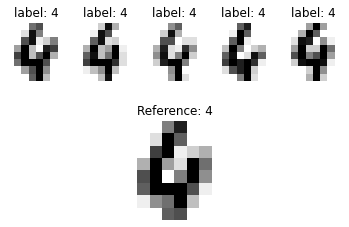

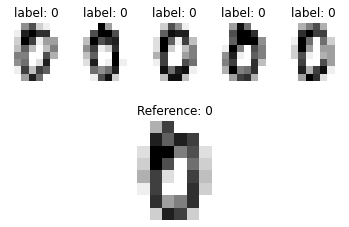

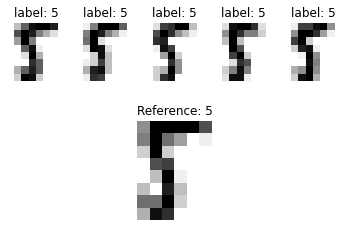

In [43]:
for digit_reference_image_index in range(3):
    plt.subplots(2)

    plt.axis('off')
    plt.imshow(test_images[digit_reference_image_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Reference: ' + str(test_labels[digit_reference_image_index]))

    closest_reference_neighbors = neighbors[digit_reference_image_index]
    
    for i in range(5):
        close_neighbor = closest_reference_neighbors[i]
        image = train_images[close_neighbor]
        label = train_labels[close_neighbor]
        plt.subplot(2, 5, i+1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('label: ' + str(label))


<h3>Evaluating the model</h3>

In [44]:
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



The confusion matrix shows how well the model performed in predicting. It can be used to see if the model is prone to confuse a specific pair of classes.

In the matrix, the rows represent the predicted labels and the columns represent the true labels.

For instance, in our matrix we can see that data with the true label 0 was confused once with the label 4. This caused the model to wrongly classify a single zero with a four.

In [45]:
print(metrics.confusion_matrix( test_labels, predicted_labels))

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 55  0  0  1  1  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  0  0  0  0  1 47  1]
 [ 0  0  0  1  0  2  0  0  0 52]]


<h2>k-Means</h2>

In our case, it's a 10-means model. Meaning that there will be 10 clusters, where the center of each cluster is the mean of its members.

In [46]:
from sklearn.cluster import KMeans
import numpy as np

Initializing the classifier.

In [47]:
cluster = KMeans(n_clusters=10)

Train the model.

In [48]:
clusters = cluster.fit(train_features)

The cluster centers represent the average of all images in the cluster. The cluster center is a matrix in as many dimensions as there are pixels in an image.
By splitting the array representing the cluster center into smaller arrays of length 8, and arranging them to a matrix we recreate the average image of the cluster.

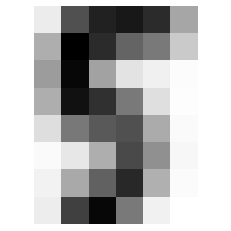

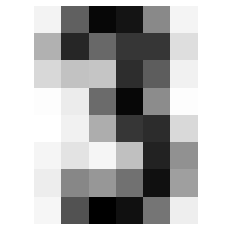

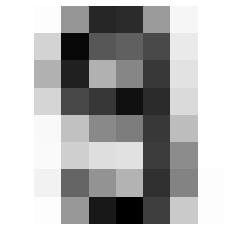

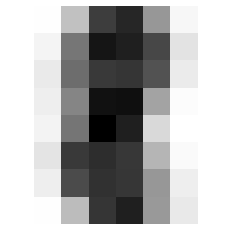

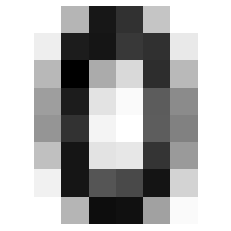

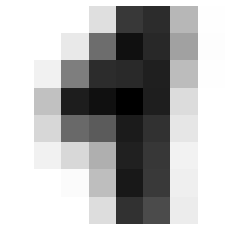

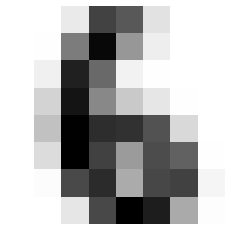

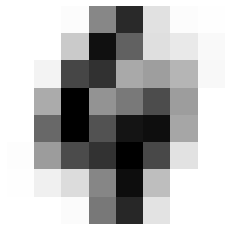

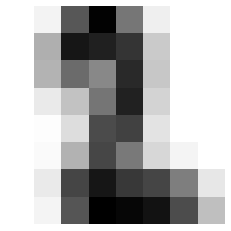

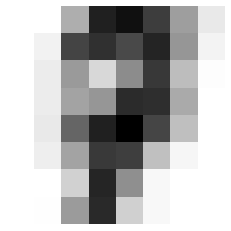

In [49]:
for i in range(10):
    center_array = clusters.cluster_centers_[i]
    center_matrix = np.split(center_array, 8)
    plt.axis('off')
    plt.imshow(center_matrix, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

Let's attempt to classify our data.

In [50]:
predicted = cluster.predict(test_features)

And generate a classification report. This report shows a terrible accuracy.

However, rerunning the fitting and prediction will probably result in different numbers. This is due to the model randomly assigning labels to the clusters. In one run, the model might correctly assign the label 0 to a cluster containing mainly zeros. In another run, it might wrongly assign the label 1 to the cluster containing mainly zeros.

In [58]:
print(metrics.classification_report( test_labels, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        53
           2       0.04      0.06      0.05        53
           3       0.08      0.11      0.09        53
           4       0.02      0.02      0.02        57
           5       0.00      0.00      0.00        56
           6       0.98      0.96      0.97        54
           7       0.00      0.00      0.00        54
           8       0.02      0.02      0.02        52
           9       0.02      0.02      0.02        55

    accuracy                           0.12       540
   macro avg       0.12      0.12      0.12       540
weighted avg       0.12      0.12      0.12       540



The confusion matrix is shown below. The reason for the high confusion is described above.

In [60]:
print(metrics.confusion_matrix(test_labels, predicted))

[[ 0  0  0  0 52  0  0  1  0  0]
 [ 1  0  0 35  0 17  0  0  0  0]
 [ 0  6  3  1  1  0  0  0 42  0]
 [ 2 40  2  6  0  0  0  0  0  3]
 [ 0  0  0  0  1  1  0 52  0  3]
 [38  0 16  0  0  0  1  1  0  0]
 [ 0  0  0  1  0  1 52  0  0  0]
 [ 0  0  0  2  0  0  0  0  0 52]
 [ 1  1 12 33  0  1  0  0  1  3]
 [ 4  3 42  0  0  5  0  0  0  1]]


Let's visualize how our predictor performed. The five first images along with their predicted and actual labels are shown below. There was only a single correct prediction among the shown images.

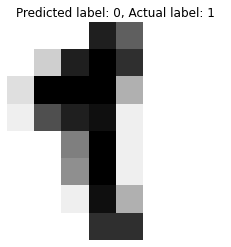

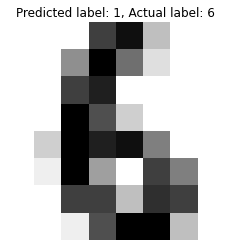

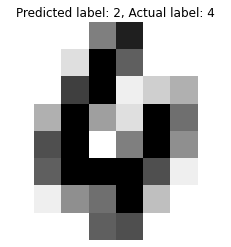

In [61]:
for predicted_label, i in enumerate(predicted[:3]):
    plt.axis('off')
    plt.imshow(test_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predicted label: ' + str(predicted_label) + ', Actual label: ' + str(test_labels[i]))
    plt.show()

The completeness score tells us how the clustering algorithm performed. A good clustering algorithm assigns all samples with the same true label to the same cluster, resulting in a completeness score of 1.0. In other words, if the digits with the same labels are all clustered together we get a good score.

In spite of terrible accuracy and a messy confusion matrix for this model we get a relatively good completeness score. This is due to the fact that images with the same true label are many times clustered together under a different predicted label. The same applies for the homogeneity score below.

In [62]:
metrics.completeness_score(test_labels, predicted)

0.7425939370562739

The homogeneity score quantifies whether the clustering algorithm meets an important requirement: a cluster should contain only samples belonging to a single class.

In [55]:
metrics.homogeneity_score(test_labels, predicted)

0.7303956966915996

In [56]:
metrics.adjusted_mutual_info_score( test_labels, predicted)

0.7269738868355363

In conclusion, we have a model which is fairly good at clustering images that are alike together. However, in order to make the model more usable a manual labeling of the clusters would be required.